## Install dependencies

In [4]:
!pip install tensorflow opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv_python-4.7.0.72-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (61.8 MB)


In [68]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
np.random.seed(2)
from sklearn.model_selection import train_test_split

#Tensorflow Version
print("TensorFlow Version:   "+tf.version.VERSION)
print("Keras Version:   "+tf.keras.__version__)

TensorFlow Version:   2.11.0
Keras Version:   2.11.0


# Build a Data Pipeline

</br>

## Loading our data
</br>


In [69]:
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

## Exploring our Data

In [70]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [71]:
# print first image
print(trainX[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [72]:
# What is the number
print(trainy[0])

5


## Visalisation

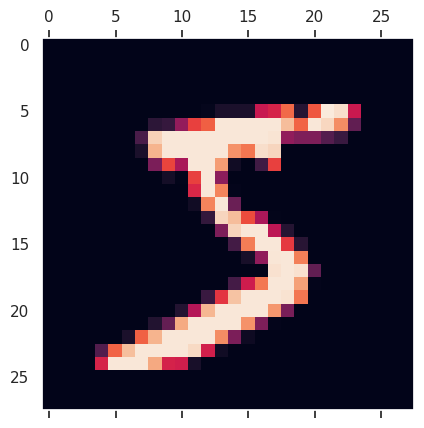

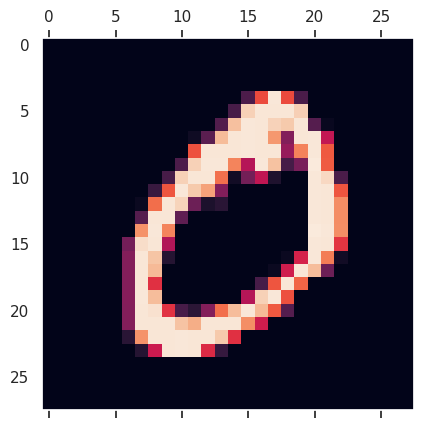

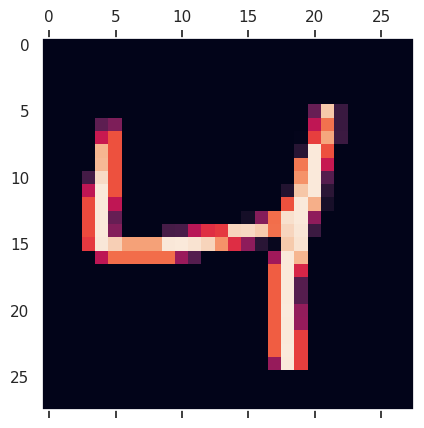

In [73]:
# plot first few images
for i in range(3):
 plt.matshow(trainX[i])

In [74]:
# How many dimensions do we have
# 3

print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [75]:
# to use the Keras API we need 4 dimensions
input_shape = (28,28,1)
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
trainX.shape, testX.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [76]:
# We also need to normalise our data

trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX /= 255
testX /= 255

# Let's build our model

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [78]:
# The model starts with a Sequential object, which allows us to create a neural network layer-by-layer.
model = Sequential()
# The first layer is a 2D convolutional layer (Conv2D) with 28 filters and a kernel size of (3,3).
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
# The second layer is a max pooling layer (MaxPooling2D) with a pool size of (2,2), reduces the spatial size of the input data
model.add(MaxPooling2D(pool_size=(2, 2)))
# The third layer is a flatten layer (Flatten), which converts the 2D output of the previous layer into a 1D vector
model.add(Flatten())
#  The output of this layer is used to learn higher-level features.
model.add(Dense(128, activation=tf.nn.relu))
# Dropout is a regularization technique that randomly drops out (i.e., sets to zero) a fraction of the neurons during training.
model.add(Dropout(0.2))
# This layer produces a probability distribution over the 10 possible output classes, which allows us to make predictions.
model.add(Dense(10,activation=tf.nn.softmax))

## Compiling and fitting the Model

In [79]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=trainX,y=trainy, epochs=10)

Epoch 1/10


2023-03-28 22:09:41.870454: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 12s 6ms/step - loss: 0.2118 - accuracy: 0.9358
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0827 - accuracy: 0.9744
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0582 - accuracy: 0.9813
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0434 - accuracy: 0.9860
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0337 - accuracy: 0.9889
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0304 - accuracy: 0.9895
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0227 - accuracy: 0.9927
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0224 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0203 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0173

# Evaluation

In [80]:
model.evaluate(testX, testy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0640 - accuracy: 0.9846


[0.0640183836221695, 0.9846000075340271]

## Testing on random number

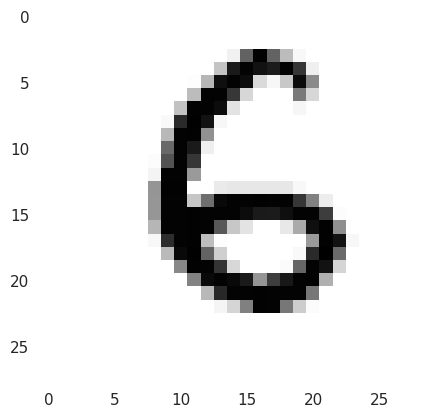

In [88]:
image_index = 1996
plt.imshow(testX[image_index].reshape(28, 28),cmap='Greys')
predict = testX[image_index].reshape(28,28)

In [89]:
pred = model.predict(testX[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

1/1 [==============================] - 0s 14ms/step
6
